먼저 데이터의 전반적인 모습과 데이터의 변수들을 살펴보자.

In [3]:
import pandas as pd
trainset = pd.read_csv('train.csv')
print(trainset.head(), trainset.dtypes)

   index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   

                      edu_type     family_type           house_type  \
0             Higher education         Married  Municipal apartment   
1  Secondary secondary special  Civil marriage      House apartment   
2             Higher education         Married      House apartment   
3  Secondary secondary special         Married      House apartment   
4             Higher education         Married      House apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -13899          -4709      

변수의 값이 2개인 이진 변수는 gender, car, reality, FLAG_MOBIL, work_phone, phone, email 등이 있다.
이 변수들이 credit 값에 대해서 어떻게 분포하고 있는지 살펴보자
 

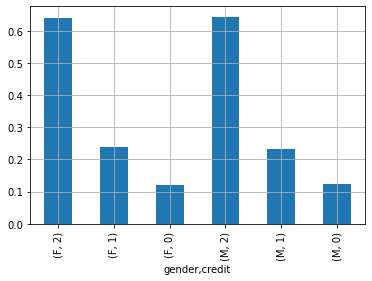

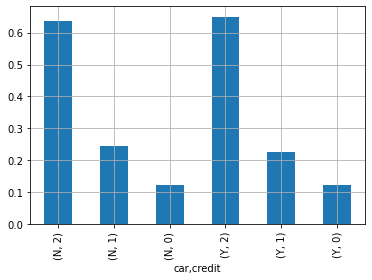

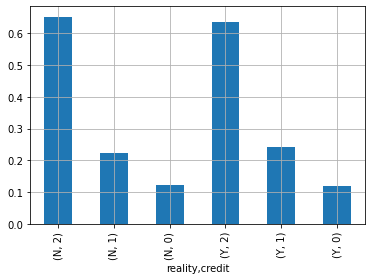

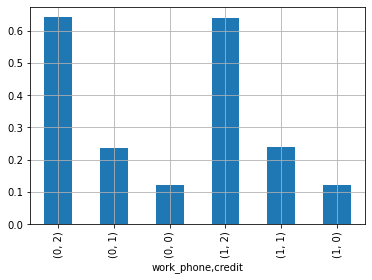

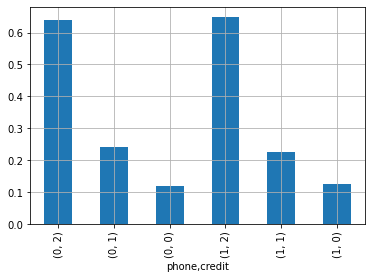

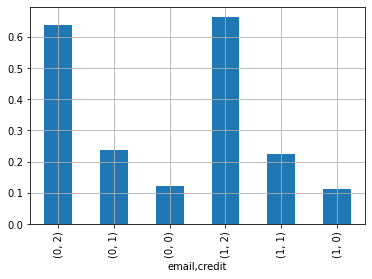

In [8]:
from matplotlib import pyplot as plt
variable_binary = trainset.columns[trainset.apply(pd.unique, axis=0).apply(len).apply(lambda x : x==2)]
for variable in variable_binary : 
    trainset_gender = trainset.groupby(['{}'.format(variable)])['credit'].value_counts(normalize=True)
    trainset_gender.plot.bar(grid = True)
    plt.show()

이진 변수들에 대해서는 변수 내에서 큰 분포의 차이를 보이지 않았다. 다음으로 변수의 값이 2개보다 많은 변수를 살펴보자.


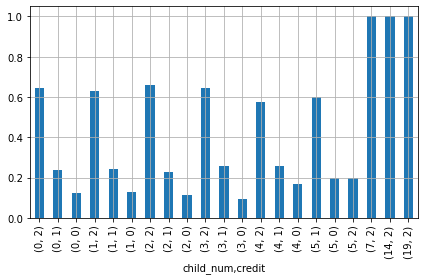

In [10]:
trainset_child = trainset.groupby(['child_num'])['credit'].value_counts(normalize=True)
trainset_child.plot.bar(grid = True)
plt.tight_layout()
plt.show()

child_num 변수 같은 경우, 3명, 7명, 14명, 19명 일때, 신용등급이 낮은 사람들의 빈도가 낮은 것을 알 수 있다.

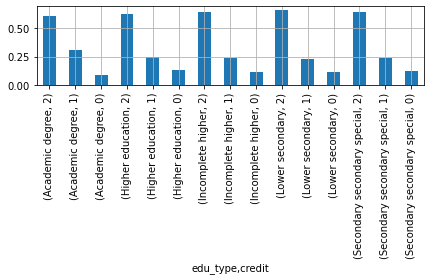

In [11]:
trainset_edu = trainset.groupby(['edu_type'])['credit'].value_counts(normalize=True)
trainset_edu.plot.bar(grid = True)
plt.tight_layout()
plt.show()

edu_type 변수 같은 경우, Academic degree, Higher education 변수는 상대적으로 높은 학력에 해당하고, incomplete higher, lower secondary, secondary secondary special 변수는 상대적으로 낮은 학력에 해당하는데, 흥미로운 사실은 acadmic degree 변수